# Reading And Writing Data

- [Overview](#Overview)
- [Data From Excel](#Data-From-Excel)
- [Data Into Python](#Data-Into-Python)
- [Dictionaries Introduction](#Dictionaries-Introduction)
- [Data From Python](#Data-From-Python)


## Overview

- In *Excel* $\to$ save as `.csv` or `.xlsx` files
- In *Python* $\to$ use the `pandas` module
- Further `pandas` documentation:
    - [10 Minutes to Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
    - [Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)

## Getting Data In/Out

### Data From *Excel*

- Saving data $\to$ Save As $\to$ `xlsx Spreadsheet (.xlsx)`
- Saving data $\to$ Save As $\to$ `Text CSV (.csv)`
    - Export settings:
        - Field delimiter $\to$ separates data by this character
- Saving data $\to$ Save As $\to$ `Microsoft Excel (.xlsx)`
- `.csv` vs `.xlsx`
    - `.csv` $\to$ raw text data $\to$ no formula are stored $\to$ only values stored
    - `.xlsx` $\to$ store formula and values

### Data Into *Python*

- Load data with `pandas`:
    - `pandas.read_csv(filename)`
    - `pandas.read_excel(filename, sheet_name=sheet)`

### Outcomes
- load data into *Python*
- `pandas` data frame object
    - `index` $\to$ row indexes
    - `columns` $\to$ column headings
    - `values` $\to$ `numpy` array of data
- selecting data
    - selecting one or more columns of data
    - selecting one or more rows of data
- plot darts (scatter plot)
- plot histogram of darts distance

    x coord  y coord   dist  in circle
0     1.405   -1.217  1.859       True
1     1.814   -0.096  1.817       True
2    -0.857    1.391  1.633       True
3    -0.125   -0.258  0.286       True
4     1.714   -1.784  2.474      False
5     0.535    0.609  0.811       True
6     0.150    0.055  0.160       True
7    -0.731    1.646  1.801       True
8     0.205   -1.371  1.387       True
9     1.096    0.639  1.269       True
10   -1.733   -1.491  2.286      False
11    1.287   -1.864  2.265      False
12    0.548    0.233  0.595       True
13   -1.293   -1.285  1.823       True
14    0.335    0.204  0.392       True
15   -0.574    0.257  0.629       True
16   -1.296   -0.828  1.538       True
17    0.560    1.776  1.862       True
18    0.467    0.668  0.816       True
19   -1.986   -0.816  2.147      False
20    1.264    1.437  1.914       True
21    0.825   -0.538  0.985       True
22   -0.429    1.559  1.617       True
23   -0.448   -0.358  0.574       True
24    0.116    0.126  0.1

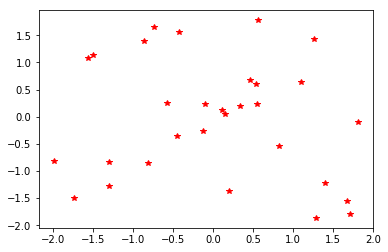

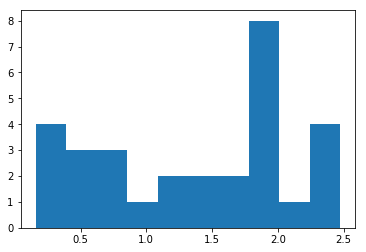

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

#pdata = pd.read_csv('data_files/darts_data.csv')
pdata = pd.read_csv('data_files\darts_data.csv')
print(pdata)
# print(pdata.index)
# print(pdata.columns)
# print(pdata.values)
# print(pdata[['x coord', 'y coord']])
# print(pdata.loc[[0, 1]])

plt.figure(1)
plt.plot(pdata['x coord'], pdata['y coord'], 'r*')

plt.figure(2)
plt.hist(pdata['dist'])

plt.show()

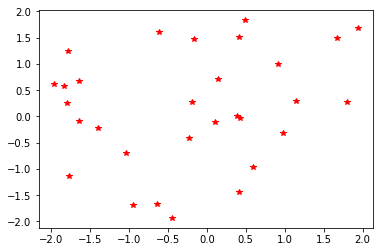

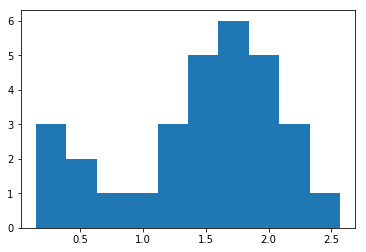

In [2]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

#pdata = pd.read_excel('data_files/darts_data.xlsx', sheet_name='Sheet1')
pdata = pd.read_excel('data_files\darts_data.xlsx', sheet_name='Sheet1')
# print(pdata)
# print(pdata.index)
# print(pdata.columns)
# print(pdata.values)
# print(pdata[['x coord', 'y coord']])
# print(pdata.loc[[0, 1]])

plt.figure(1)
plt.plot(pdata['x coord'], pdata['y coord'], 'r*')

plt.figure(2)
plt.hist(pdata['dist'])

plt.show()

### Dictionaries Introduction

- Dictionaries allow us to group objects under 1 name using keywords
- Created using curly brackets `{}`
- Can store any object types or mix of object types

In [3]:
var = {
    'x': [2, 5, 1, 0, 9],
    'y': [1],
    'z': [0, 1, 2],
    'name': 'SomeName'
}

print(var)
print(var['x'])
print(var['name'])

print(var['z'][2])

lst = var['z']
print(lst[2])

{'x': [2, 5, 1, 0, 9], 'y': [1], 'z': [0, 1, 2], 'name': 'SomeName'}
[2, 5, 1, 0, 9]
SomeName
2
2


In [4]:
import numpy as np

data = {
    'x': np.array([4, 2,  5, 1]),
    'y': np.array([8, 4, 10, 2])
}

print(type(data))
print(data['x'])
print(data['y'])

<class 'dict'>
[4 2 5 1]
[ 8  4 10  2]


- `pandas` data frame objects are just "cleaver" dictionary like objects

### Example - Calculating molar mass

- Calculate the molar mass of Glucose
$$C_6 H_{12} O_6$$

In [5]:
atomic_weight = {
    'H': 1,
    'C': 12,
    'N': 14,
    'O': 16,
    'S': 32
}

syms = ['C', 'H', 'O']
mult = [ 6,   12,  6 ]

mass = 0
for i in range(len(syms)):
    s = syms[i]
    m = mult[i]
    w = atomic_weight[s]
    mass = mass + (w * m)
print(mass)

180


In [6]:
atomic_weight = {'H': 1, 'C': 12, 'N': 14, 'O': 16, 'S': 32}

def molar_mass(formula):
    total = 0
    for character in formula:
        if character in atomic_weight:
            weight = atomic_weight[character]
            multiplier = 1
        else:
            multiplier = int(character) - 1
        total = total + weight * multiplier
    return total


formula = ['C', 6, 'H', 12, 'O', 6]
mass = molar_mass(formula)
print(mass)

180


### Data From *Python*

- Create a `pandas` data frame object
- Write data:
    - `pandas.to_csv(filename)`
    - `pandas.to_excel(filename, sheet_name=sheet)`

### Outcomes
- Creating a `pandas` data frame object
- Writing the data to `.csv` or `.xlsx` files

In [7]:
import numpy as np
import pandas as pd

x = np.linspace(0, 10, 100)
y = x**2 + 10

data = {
    'x coords': x,
    'y coords': y,
}

pdata = pd.DataFrame(data)

pdata.to_csv('mydata.csv')
pdata.to_excel('mydata.xlsx', sheet_name='Sheet2')

### Example - Experimental Data

- Consider an experimental setup whereby air is forced through a rectangular channel. Inside this channel there are several obstacles (cylindrical pins) that obstruct the flow.


- The flow velocity and pressure is measured at 39 different points along the the channel with pressure taps


- 50 data readings are taken for each of the pressure taps


- Plot an error bar plot showing the statistical accuracy of the data readings for each probe


###  Outcomes:

- `array.reshape` function


- Box plot (Error bar plot)

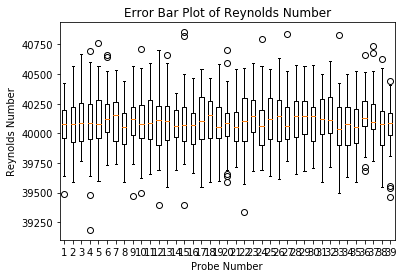

In [8]:
%matplotlib inline
#%matplotlib qt5
import pandas as pd
from matplotlib import pyplot as plt

dataframe = pd.read_csv('data_files/experimental_data.csv', sep='\t')

renolds = dataframe['Re'].values
renolds = renolds.reshape((50, 39))

plt.boxplot(renolds)
plt.title("Error Bar Plot of Reynolds Number")
plt.xlabel("Probe Number")
plt.ylabel("Reynolds Number")
plt.show()

### Re-shape in Numpy

In [9]:
import numpy as np
aa = np.array([1,2,3,4,5,6,7,8,9,0])
bb = np.copy(aa)
aa = np.reshape(aa,(5,2),'F')
aa

array([[1, 6],
       [2, 7],
       [3, 8],
       [4, 9],
       [5, 0]])

In [10]:
bb = np.reshape(bb,(5,2))
bb

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8],
       [9, 0]])